In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load the uploaded Output.csv file
df = pd.read_csv("Output.csv")

# Filter for children under 5 with valid nutritional data
df_filtered = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990) &
    (df["HW71"] < 9990) &
    (df["HW72"] < 9990)
].copy()

# Create malnutrition indicators
df_filtered["stunted"] = (df_filtered["HW70"] < -200).astype(int)
df_filtered["underweight"] = (df_filtered["HW71"] < -200).astype(int)
df_filtered["wasting"] = (df_filtered["HW72"] < -200).astype(int)
df_filtered["any_undernutrition"] = (
    (df_filtered["stunted"] == 1) |
    (df_filtered["underweight"] == 1) |
    (df_filtered["wasting"] == 1)
).astype(int)
df_filtered["all_undernutrition"] = (
    (df_filtered["stunted"] == 1) &
    (df_filtered["underweight"] == 1) &
    (df_filtered["wasting"] == 1)
).astype(int)

# Create parental education comparison
df_filtered["edu_diff"] = pd.cut(
    df_filtered["V701"] - df_filtered["V106"],
    bins=[-float("inf"), -1, 0, float("inf")],
    labels=["Father < Mother", "Father = Mother", "Father > Mother"]
)

# Add residence label
df_filtered["residence"] = df_filtered["V025"].map({1: "Urban", 2: "Rural"})

# Group and summarize
summary = df_filtered.groupby(["residence", "edu_diff"]).agg(
    stunting_rate=("stunted", lambda x: round(x.mean() * 100, 1)),
    underweight_rate=("underweight", lambda x: round(x.mean() * 100, 1)),
    wasting_rate=("wasting", lambda x: round(x.mean() * 100, 1)),
    any_undernutrition_rate=("any_undernutrition", lambda x: round(x.mean() * 100, 1)),
    all_undernutrition_rate=("all_undernutrition", lambda x: round(x.mean() * 100, 1)),
    n=("stunted", "count")
).reset_index()

# Add totals for each residence group
totals = df_filtered.groupby("residence").agg(
    stunting_rate=("stunted", lambda x: round(x.mean() * 100, 1)),
    underweight_rate=("underweight", lambda x: round(x.mean() * 100, 1)),
    wasting_rate=("wasting", lambda x: round(x.mean() * 100, 1)),
    any_undernutrition_rate=("any_undernutrition", lambda x: round(x.mean() * 100, 1)),
    all_undernutrition_rate=("all_undernutrition", lambda x: round(x.mean() * 100, 1)),
    n=("stunted", "count")
).reset_index()

totals["edu_diff"] = "Total"
final_summary = pd.concat([summary, totals], ignore_index=True)
# To view the table
print(final_summary)






##Save 



fig, ax = plt.subplots(figsize=(12, len(final_summary) * 0.5 + 2))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=final_summary.values,
                 colLabels=final_summary.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save to PDF
with PdfPages("Parental_Education_vs_Malnutrition.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

print("PDF exported successfully.")



  residence         edu_diff  stunting_rate  underweight_rate  wasting_rate  \
0     Rural  Father < Mother           19.3               6.0          10.7   
1     Rural  Father = Mother           20.3               6.6          10.1   
2     Rural  Father > Mother           21.6               5.0           8.2   
3     Urban  Father < Mother           19.1               6.6          10.3   
4     Urban  Father = Mother           18.2               6.9          12.3   
5     Urban  Father > Mother           19.9               7.6          12.2   
6     Rural            Total           20.5               6.1           9.6   
7     Urban            Total           18.7               6.9          11.9   

   any_undernutrition_rate  all_undernutrition_rate     n  
0                     29.4                      0.9   879  
1                     29.9                      0.9  3227  
2                     29.4                      0.5  1542  
3                     28.8                      

/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/961631861.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_filtered.groupby(["residence", "edu_diff"]).agg(


In [20]:

# Recode father's occupation
df_filtered["Father_occupation"] = pd.cut(
    df_filtered["V704"],
    bins=[0, 54, 96],
    labels=["Service/Business", "Agriculture/Others"]
)

# Recode mother's working status
df_filtered["Mother_working_status"] = df_filtered["V731"].map({1: "Working", 0: "Not working"})

# Recode residence
df_filtered["residence"] = df_filtered["V025"].map({1: "Urban", 2: "Rural"})

# Group and calculate percentages
summary = df_filtered.groupby(["residence", "Father_occupation", "Mother_working_status"]).agg(
    Stunted=("stunted", lambda x: round(x.mean() * 100, 1)),
    Underweight=("underweight", lambda x: round(x.mean() * 100, 1)),
    Wasting=("wasting", lambda x: round(x.mean() * 100, 1)),
    Any_undernutrition=("any_undernutrition", lambda x: round(x.mean() * 100, 1)),
    All_undernutrition=("all_undernutrition", lambda x: round(x.mean() * 100, 1)),
    N=("stunted", "count")
).reset_index()

print(summary)








fig, ax = plt.subplots(figsize=(12, len(summary) * 0.5 + 2))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=summary.values,
                 colLabels=summary.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save to PDF
with PdfPages("Father's_occupation_vs_Mother_working_status.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

print("PDF exported successfully.")




  residence   Father_occupation Mother_working_status  Stunted  Underweight  \
0     Rural    Service/Business           Not working     18.3          5.2   
1     Rural    Service/Business               Working     18.2          9.1   
2     Rural  Agriculture/Others           Not working     21.4          6.5   
3     Rural  Agriculture/Others               Working     26.3          5.3   
4     Urban    Service/Business           Not working     18.0          7.2   
5     Urban    Service/Business               Working     12.5         12.5   
6     Urban  Agriculture/Others           Not working     19.7          7.4   
7     Urban  Agriculture/Others               Working     15.4          7.7   

   Wasting  Any_undernutrition  All_undernutrition     N  
0      8.6                26.7                 0.6  1716  
1     18.2                36.4                 0.0    11  
2     10.6                31.4                 0.9  3213  
3      5.3                31.6                 0.0  

/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/833894288.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_filtered.groupby(["residence", "Father_occupation", "Mother_working_status"]).agg(


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load the dataset
df = pd.read_csv("Output.csv")

# Filter for children under 5 with valid nutritional data
df_filtered = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990) &
    (df["HW71"] < 9990) &
    (df["HW72"] < 9990)
].copy()

# Create malnutrition indicators
df_filtered["stunted"] = (df_filtered["HW70"] < -200).astype(int)
df_filtered["underweight"] = (df_filtered["HW71"] < -200).astype(int)
df_filtered["wasting"] = (df_filtered["HW72"] < -200).astype(int)
df_filtered["any_undernutrition"] = (
    (df_filtered["stunted"] == 1) |
    (df_filtered["underweight"] == 1) |
    (df_filtered["wasting"] == 1)
).astype(int)
df_filtered["all_undernutrition"] = (
    (df_filtered["stunted"] == 1) &
    (df_filtered["underweight"] == 1) &
    (df_filtered["wasting"] == 1)
).astype(int)

# Recode maternal education
df_filtered["Maternal_education"] = pd.cut(
    df_filtered["V106"],
    bins=[-1, 0, 1, 3],
    labels=["No education", "Primary", "Secondary and above"]
)

# Recode mother's working status and residence
df_filtered["Mother_working_status"] = df_filtered["V714"].map({1: "Working", 0: "Not working"})
df_filtered["residence"] = df_filtered["V025"].map({1: "Urban", 2: "Rural"})

# Group and summarize
summary_table = df_filtered.groupby(
    ["residence", "Maternal_education", "Mother_working_status"]
).agg(
    Stunted=("stunted", lambda x: round(x.mean() * 100, 1)),
    Underweight=("underweight", lambda x: round(x.mean() * 100, 1)),
    Wasting=("wasting", lambda x: round(x.mean() * 100, 1)),
    Any_Undernutrition=("any_undernutrition", lambda x: round(x.mean() * 100, 1)),
    All_Undernutrition=("all_undernutrition", lambda x: round(x.mean() * 100, 1)),
    N=("stunted", "count")
).reset_index()

print(summary_table)

# Plot and export table to PDF
fig, ax = plt.subplots(figsize=(14, len(summary_table) * 0.5 + 2))
ax.axis('off')

# Create the table
table = ax.table(
    cellText=summary_table.values,
    colLabels=summary_table.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.1, 1.1)

# Save to PDF
with PdfPages("Maternal_vs_Malnutrition.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

print("PDF exported successfully.")


   residence   Maternal_education Mother_working_status  Stunted  Underweight  \
0      Rural         No education           Not working     24.2          6.8   
1      Rural         No education               Working     28.2          8.3   
2      Rural              Primary           Not working     24.1          8.6   
3      Rural              Primary               Working     34.5          3.6   
4      Rural  Secondary and above           Not working     18.0          5.3   
5      Rural  Secondary and above               Working     17.6          5.6   
6      Urban         No education           Not working     21.3          7.9   
7      Urban         No education               Working     32.3          3.2   
8      Urban              Primary           Not working     21.3          8.9   
9      Urban              Primary               Working     18.2          0.0   
10     Urban  Secondary and above           Not working     18.1          7.1   
11     Urban  Secondary and 

/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/3848854020.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df_filtered.groupby(


In [23]:
# Recode father's education
df_filtered["Father_education"] = pd.cut(
    df_filtered["V701"],
    bins=[-1, 0, 1, 3],
    labels=["No education", "Primary", "Secondary and above"]
)

# Recode father's occupation
df_filtered["Father_occupation"] = pd.cut(
    df_filtered["V704"],
    bins=[0, 54, 96],
    labels=["Service/Business", "Agriculture/Others"]
)

# Recode residence
df_filtered["residence"] = df_filtered["V025"].map({1: "Urban", 2: "Rural"})

# Group and summarize the data
summary_table = df_filtered.groupby(["residence", "Father_education", "Father_occupation"]).agg(
    Stunted=("stunted", lambda x: round(x.mean() * 100, 1)),
    Underweight=("underweight", lambda x: round(x.mean() * 100, 1)),
    Wasting=("wasting", lambda x: round(x.mean() * 100, 1)),
    Any_Undernutrition=("any_undernutrition", lambda x: round(x.mean() * 100, 1)),
    All_Undernutrition=("all_undernutrition", lambda x: round(x.mean() * 100, 1)),
    N=("stunted", "count")
).reset_index()

print(summary_table)




fig, ax = plt.subplots(figsize=(12, len(summary_table) * 0.5 + 2))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=summary_table.values,
                 colLabels=summary_table.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save to PDF
with PdfPages("Paternal_vs_Malnutrition.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

print("PDF exported successfully.")



   residence     Father_education   Father_occupation  Stunted  Underweight  \
0      Rural         No education    Service/Business     23.6         12.6   
1      Rural         No education  Agriculture/Others     25.3          7.1   
2      Rural              Primary    Service/Business     24.3          7.2   
3      Rural              Primary  Agriculture/Others     22.3          7.4   
4      Rural  Secondary and above    Service/Business     17.7          4.8   
5      Rural  Secondary and above  Agriculture/Others     19.9          5.8   
6      Urban         No education    Service/Business     20.6          8.8   
7      Urban         No education  Agriculture/Others     19.8          6.3   
8      Urban              Primary    Service/Business     14.1          7.8   
9      Urban              Primary  Agriculture/Others     23.0          8.7   
10     Urban  Secondary and above    Service/Business     17.8          6.5   
11     Urban  Secondary and above  Agriculture/Other

/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/2861353461.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df_filtered.groupby(["residence", "Father_education", "Father_occupation"]).agg(


In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit


probit_data = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990) & (df["HW71"] < 9990) & (df["HW72"] < 9990) &
    (df["V106"].between(0, 3)) & (df["V701"].between(0, 3)) &
    (df["V714"].isin([0, 1, 2, 3])) &
    (df["V704"].between(0, 96)) &
    (df["V025"].isin([1, 2]))
].copy()

# Recode residence
probit_data["residence"] = probit_data["V025"].map({1: "Urban", 2: "Rural"})

# Outcome indicators
probit_data["stunted"] = (probit_data["HW70"] < -200).astype(int)
probit_data["underweight"] = (probit_data["HW71"] < -200).astype(int)
probit_data["wasting"] = (probit_data["HW72"] < -200).astype(int)
probit_data["any_undernutrition"] = (
    probit_data["stunted"] | probit_data["underweight"] | probit_data["wasting"]
).astype(int)

# Add recoded media access
probit_data["media_access"] = (
    ((probit_data["V157"].between(1, 3)) |
     (probit_data["V158"].between(1, 3)) |
     (probit_data["V159"].between(1, 3)))
).astype(int)

# Add BMI placeholder
probit_data["BMI"] = probit_data.get("Mother_BMI", pd.NA)

# Define variables
outcomes = ["stunted", "underweight", "wasting", "any_undernutrition"]
parental_vars = ["V106", "V701", "V714", "V704"]
control_vars = ["media_access", "V012", "V101", "V190", "V511", "V212", "HW1", "BORD", "V218", "B11"]


all_results = []
for outcome in outcomes:
    for model in ["Model 1", "Model 2", "Model 3"]:
        for res in ["Urban", "Rural"]:
            df_sub = probit_data[probit_data["residence"] == res].copy()
            y = df_sub[outcome]

            # Choose predictors based on model
            if model == "Model 1":
                for var in parental_vars:
                    X = sm.add_constant(df_sub[[var]])
                    try:
                        probit = Probit(y, X).fit(disp=False)
                        coef = round(probit.params[var], 3)
                    except:
                        coef = None
                    all_results.append([outcome, var, model, res, coef])
            elif model == "Model 2":
                X = sm.add_constant(df_sub[parental_vars])
                try:
                    probit = Probit(y, X).fit(disp=False)
                    for var in parental_vars:
                        coef = round(probit.params[var], 3)
                        all_results.append([outcome, var, model, res, coef])
                except:
                    for var in parental_vars:
                        all_results.append([outcome, var, model, res, None])
            elif model == "Model 3":
                model3_vars = parental_vars + control_vars
                available = [v for v in model3_vars if v in df_sub.columns and df_sub[v].notna().sum() > 0]
                X = sm.add_constant(df_sub[available])
                try:
                    probit = Probit(y, X).fit(disp=False)
                    for var in parental_vars:
                        if var in probit.params:
                            coef = round(probit.params[var], 3)
                        else:
                            coef = None
                        all_results.append([outcome, var, model, res, coef])
                except:
                    for var in parental_vars:
                        all_results.append([outcome, var, model, res, None])

# Convert results to DataFrame
flat_results_df = pd.DataFrame(all_results, columns=["Outcome", "Variable", "Model", "Residence", "Coefficient"])

# Pivot into table format like Table 7
final_table = flat_results_df.pivot_table(
    index=["Outcome", "Variable"],
    columns=["Model", "Residence"],
    values="Coefficient",
    aggfunc="first"
)[[
    ("Model 1", "Urban"), ("Model 1", "Rural"),
    ("Model 2", "Urban"), ("Model 2", "Rural"),
    ("Model 3", "Urban"), ("Model 3", "Rural")
]]

# Rename columns
final_table.columns = ['M1_Urban', 'M1_Rural', 'M2_Urban', 'M2_Rural', 'M3_Urban', 'M3_Rural']
final_table = final_table.reset_index()


variable_labels = {
    "V106": "Mother's education",
    "V701": "Father's education",
    "V714": "Mother's working status",
    "V704": "Father's occupation"
}
final_table["Variable"] = final_table["Variable"].map(variable_labels)

# Display table
print(final_table)






               Outcome                 Variable  M1_Urban  M1_Rural  M2_Urban  \
0   any_undernutrition       Mother's education    -0.039    -0.079    -0.029   
1   any_undernutrition       Father's education    -0.028    -0.079    -0.002   
2   any_undernutrition      Father's occupation     0.001     0.002     0.001   
3   any_undernutrition  Mother's working status    -0.041    -0.031    -0.018   
4              stunted       Mother's education    -0.031    -0.108    -0.019   
5              stunted       Father's education    -0.026    -0.086    -0.004   
6              stunted      Father's occupation     0.001     0.003     0.001   
7              stunted  Mother's working status    -0.026     0.034    -0.005   
8          underweight       Mother's education    -0.040    -0.056    -0.013   
9          underweight       Father's education    -0.027    -0.098     0.011   
10         underweight      Father's occupation     0.002     0.001     0.002   
11         underweight  Moth

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Output.csv")

# Filter to include only children under 5 (age in months <= 59) and valid Z-scores
filtered_df = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990) &
    (df["HW71"] < 9990) &
    (df["HW72"] < 9990)
]

# Count total number of valid children in the dataset
total_children = filtered_df.shape[0]
total_children


9333

In [7]:
# Filter children under 5 years with valid Z-score data
df_valid = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990) &
    (df["HW71"] < 9990) &
    (df["HW72"] < 9990)
].copy()

# Create malnutrition indicators
df_valid["stunted"] = (df_valid["HW70"] < -200).astype(int)
df_valid["underweight"] = (df_valid["HW71"] < -200).astype(int)
df_valid["wasting"] = (df_valid["HW72"] < -200).astype(int)

# Map residence values to readable form
df_valid["residence"] = df_valid["V025"].map({1: "Urban", 2: "Rural"})

# Group by residence and calculate malnutrition percentages
residence_summary_cleaned = df_valid.groupby("residence").agg(
    Total_Children=("stunted", "count"),
    Stunted_Percent=("stunted", lambda x: round(x.mean() * 100, 1)),
    Underweight_Percent=("underweight", lambda x: round(x.mean() * 100, 1)),
    Wasting_Percent=("wasting", lambda x: round(x.mean() * 100, 1))
).reset_index()
print(residence_summary_cleaned)

  residence  Total_Children  Stunted_Percent  Underweight_Percent  \
0     Rural            5648             20.5                  6.1   
1     Urban            3685             18.7                  6.9   

   Wasting_Percent  
0              9.6  
1             11.9  


In [8]:
# Find total number of unique respondents using CASEID
total_respondents = df["CASEID"].nunique()
total_respondents


8526

In [13]:
import pandas as pd
import scipy.stats as stats



# Filter children under 5 years and valid anthropometric scores
df_filtered = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990) &
    (df["HW71"] < 9990) &
    (df["HW72"] < 9990)
].copy()

# Create binary malnutrition indicators
df_filtered["stunted"] = (df_filtered["HW70"] < -200).astype(int)
df_filtered["underweight"] = (df_filtered["HW71"] < -200).astype(int)
df_filtered["wasting"] = (df_filtered["HW72"] < -200).astype(int)

# Selecting variables of interest
covariates = {
    "Mother’s age": "V012",
    "Mother’s education": "V106",
    "Father’s education": "V701",
    "Mother’s working status": "V714",
    "Father’s occupation": "V704",
    "Access to media": lambda df: (
        (df["V157"].between(1, 3)) |
        (df["V158"].between(1, 3)) |
        (df["V159"].between(1, 3))
    ).astype(int),
    "Wealth index": "V190",
    "Age at first marriage": "V511",
    "Age at first birth": "V212",
    "Mother’s BMI": lambda df: df["V445"] / 100,
    "Child age": "HW1",
    "Number of living children": "V218"
}

# Store results
results = []

# Perform chi-square or t-test depending on variable type
for label, col in covariates.items():
    if callable(col):
        df_filtered[label] = col(df_filtered)
    else:
        df_filtered[label] = df_filtered[col]

    for outcome in ["stunted", "underweight", "wasting"]:
        try:
            if df_filtered[label].nunique() > 10:
                # Continuous variable -> t-test
                group1 = df_filtered[df_filtered[outcome] == 1][label]
                group0 = df_filtered[df_filtered[outcome] == 0][label]
                stat, pvalue = stats.ttest_ind(group1, group0, equal_var=False, nan_policy='omit')
                freq = group1.count()
            else:
                # Categorical variable -> chi-square test
                contingency = pd.crosstab(df_filtered[label], df_filtered[outcome])
                chi2, pvalue, _, _ = stats.chi2_contingency(contingency)
                freq = df_filtered[df_filtered[outcome] == 1].shape[0]
        except Exception as e:
            pvalue = None
            freq = 0

        results.append({
            "Covariate": label,
            "Outcome": outcome,
            "Frequency": freq,
            "P-Value": pvalue
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print(results_df)


                    Covariate      Outcome  Frequency       P-Value
0                Mother’s age      stunted       1846  1.645521e-02
1                Mother’s age  underweight        599  8.937768e-01
2                Mother’s age      wasting        983  1.713501e-01
3          Mother’s education      stunted       1846  4.327951e-10
4          Mother’s education  underweight        599  4.864892e-02
5          Mother’s education      wasting        983  6.208360e-01
6          Father’s education      stunted       1846  5.966875e-05
7          Father’s education  underweight        599  1.676363e-02
8          Father’s education      wasting        983  1.483432e-01
9     Mother’s working status      stunted       1846  9.366110e-01
10    Mother’s working status  underweight        599  1.655039e-01
11    Mother’s working status      wasting        983  1.896019e-01
12        Father’s occupation      stunted       1846  8.224576e-04
13        Father’s occupation  underweight      

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the uploaded Output.csv file
df = pd.read_csv("Output.csv")

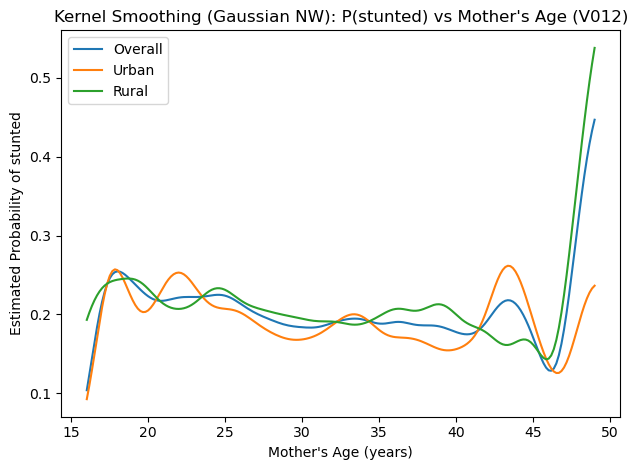

NameError: name 'SHOW_PLOTS' is not defined

In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


INPUT_CSV = "Output.csv"  
OUT_DIR   = "kernel_outputs"
N_GRID    = 200           



def gaussian_kernel(u: np.ndarray) -> np.ndarray:
    """Standard normal pdf as kernel."""
    return np.exp(-0.5 * u * u) / np.sqrt(2 * np.pi)


def silverman_bandwidth(x: np.ndarray) -> float:
    """
    Silverman's rule-of-thumb bandwidth for continuous x.
    h = 1.06 * min(std, IQR/1.349) * n^(-1/5)
    """
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    n = x.size
    if n < 2:
        return np.nan

    std = np.std(x, ddof=1)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    sigma = min(std, iqr / 1.349) if std > 0 else (iqr / 1.349 if iqr > 0 else 1.0)
    h = 1.06 * sigma * (n ** (-1/5))

    # Fallback if degenerate
    if not np.isfinite(h) or h <= 0:
        h = max(std, 1.0) * (n ** (-1/5)) * 0.9
    return h


def nadaraya_watson_prob(x: np.ndarray, y: np.ndarray, grid: np.ndarray, h: float) -> np.ndarray:
    """
    Nadaraya–Watson smoother for binary y: returns estimated probability at each grid point.
    p_hat(g) = sum_i K((x_i - g)/h) * y_i / sum_i K((x_i - g)/h)
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    if x.size == 0 or not np.isfinite(h) or h <= 0:
        return np.full_like(grid, np.nan, dtype=float)

    # Vectorized kernel weights: (n, m) for n samples, m grid points
    diffs = (x[:, None] - grid[None, :]) / h
    w = gaussian_kernel(diffs)
    num = (w * y[:, None]).sum(axis=0)
    den = w.sum(axis=0)
    with np.errstate(invalid="ignore", divide="ignore"):
        p = num / den
    return p



def main(input_csv: str = INPUT_CSV, out_dir: str = OUT_DIR, n_grid: int = N_GRID) -> None:
    os.makedirs(out_dir, exist_ok=True)

    # Load
    df = pd.read_csv(input_csv)

    # Filter: <5 yrs and valid anthropometry
    work = df[
        (df["HW1"] <= 59) &
        (df["HW70"] < 9990) & (df["HW71"] < 9990) & (df["HW72"] < 9990)
    ].copy()

    # Outcomes
    work["stunted"]     = (work["HW70"] < -200).astype(int)
    work["underweight"] = (work["HW71"] < -200).astype(int)
    work["wasting"]     = (work["HW72"] < -200).astype(int)

    # Mother's age
    if "V012" not in work.columns:
        raise ValueError("Column 'V012' (mother's age) is missing.")
    work["V012"] = pd.to_numeric(work["V012"], errors="coerce")

    # Residence
    res_map = {1: "Urban", 2: "Rural"}
    work["group"] = work["V025"].map(res_map)
    work = work.dropna(subset=["V012"])  # ensure we have age

    # Grid over age
    age_all = work["V012"].to_numpy()
    age_min, age_max = float(np.nanmin(age_all)), float(np.nanmax(age_all))
    age_grid = np.linspace(age_min, age_max, n_grid)

    outcomes = ["stunted", "underweight", "wasting"]
    groups = [("Overall", None), ("Urban", "Urban"), ("Rural", "Rural")]

    curves = []  # tidy records

    for outcome in outcomes:
        for gname, gval in groups:
            sub = work if gval is None else work[work["group"] == gval]
            if sub.empty:
                continue

            x = sub["V012"].to_numpy()
            y = sub[outcome].to_numpy()
            h = silverman_bandwidth(x)
            p_hat = nadaraya_watson_prob(x, y, age_grid, h)
            p_hat = np.clip(p_hat, 0, 1)  # ensure probability range

            curves.append(pd.DataFrame({
                "age": age_grid,
                "p_hat": p_hat,
                "outcome": outcome,
                "group": gname,
                "bandwidth": h
            }))

        # Plot 
        plt.figure()
        for gname, gval in groups:
            sub = curves[-3:] if gname == "Overall" else None  # not used; we’ll re-select below
            sub_df = None
            # re-select from accumulated curves for this outcome/group
            for df_chunk in curves:
                if df_chunk.iloc[0]["outcome"] == outcome and df_chunk.iloc[0]["group"] == gname:
                    sub_df = df_chunk
                    break
            if sub_df is not None:
                plt.plot(sub_df["age"], sub_df["p_hat"], label=gname)

        plt.title(f"Kernel Smoothing (Gaussian NW): P({outcome}) vs Mother's Age (V012)")
        plt.xlabel("Mother's Age (years)")
        plt.ylabel(f"Estimated Probability of {outcome}")
        plt.legend()
        plt.tight_layout()
        plt.show()


        if SHOW_PLOTS:
            plt.show()  # shows the figure in interactive sessions
        else:
            os.makedirs(out_dir, exist_ok=True)
            plt.savefig(os.path.join(out_dir, f"{outcome}_vs_age.png"), dpi=150)
        plt.close()

if __name__ == "__main__":
    main()

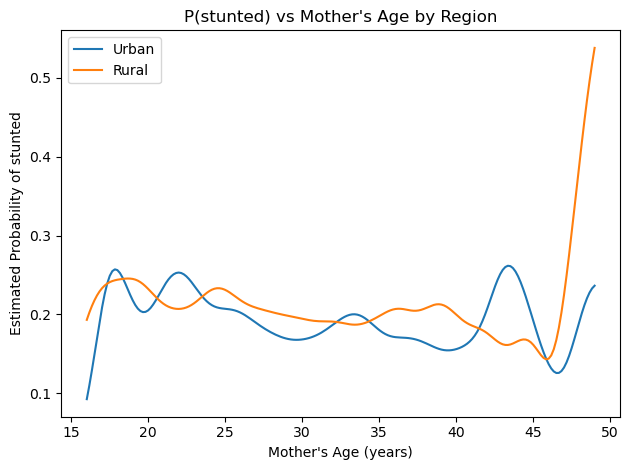

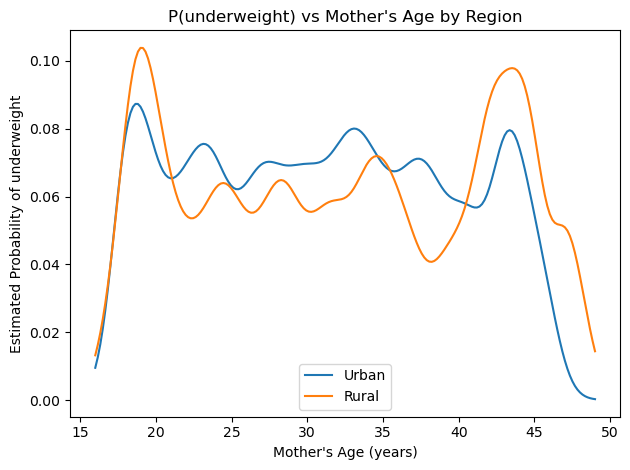

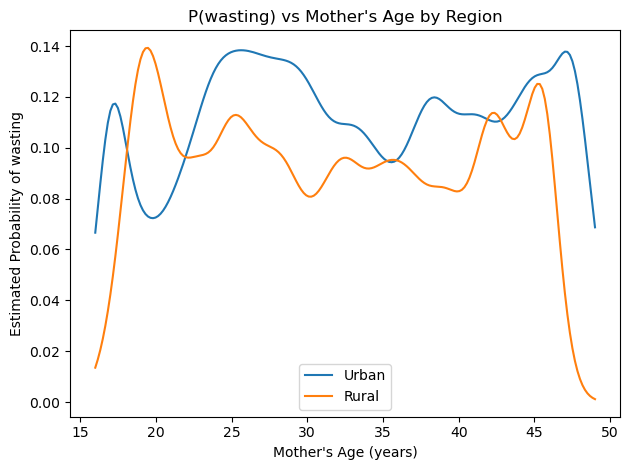

Saved tidy results to kernel_outputs_region/kernel_smoothing_region.csv
Saved plots to kernel_outputs_region/


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


INPUT_CSV = "Output.csv"          # change if your file is elsewhere
OUT_DIR   = "kernel_outputs_region"
N_GRID    = 200                   # number of points in the age grid


def gaussian_kernel(u: np.ndarray) -> np.ndarray:
    """Standard normal pdf as kernel."""
    return np.exp(-0.5 * u * u) / np.sqrt(2 * np.pi)

def silverman_bandwidth(x: np.ndarray) -> float:
    """
    Silverman's rule-of-thumb bandwidth for continuous x.
    h = 1.06 * min(std, IQR/1.349) * n^(-1/5)
    """
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    n = x.size
    if n < 2:
        return np.nan
    std = np.std(x, ddof=1)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    sigma = min(std, iqr / 1.349) if std > 0 else (iqr / 1.349 if iqr > 0 else 1.0)
    h = 1.06 * sigma * (n ** (-1/5))
    if not np.isfinite(h) or h <= 0:
        h = max(std, 1.0) * (n ** (-1/5)) * 0.9
    return h

def nadaraya_watson_prob(x: np.ndarray, y: np.ndarray, grid: np.ndarray, h: float) -> np.ndarray:
    """
    Nadaraya–Watson smoother for binary y: returns estimated probability at each grid point.
    p_hat(g) = sum_i K((x_i - g)/h) * y_i / sum_i K((x_i - g)/h)
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]
    if x.size == 0 or not np.isfinite(h) or h <= 0:
        return np.full_like(grid, np.nan, dtype=float)
    diffs = (x[:, None] - grid[None, :]) / h
    w = gaussian_kernel(diffs)
    num = (w * y[:, None]).sum(axis=0)
    den = w.sum(axis=0)
    with np.errstate(invalid="ignore", divide="ignore"):
        p = num / den
    return np.clip(p, 0, 1)

# ---------- MAIN ----------
def main(input_csv=INPUT_CSV, out_dir=OUT_DIR, n_grid=N_GRID):
    os.makedirs(out_dir, exist_ok=True)
    df = pd.read_csv(input_csv)


    work = df[
        (df["HW1"] <= 59) &
        (df["HW70"] < 9990) & (df["HW71"] < 9990) & (df["HW72"] < 9990)
    ].copy()

    # Outcomes
    work["stunted"]     = (work["HW70"] < -200).astype(int)
    work["underweight"] = (work["HW71"] < -200).astype(int)
    work["wasting"]     = (work["HW72"] < -200).astype(int)

    # Mother's age
    if "V012" not in work.columns:
        raise ValueError("Column 'V012' (mother's age) is missing.")
    work["V012"] = pd.to_numeric(work["V012"], errors="coerce")

    # Region
    res_map = {1: "Urban", 2: "Rural"}
    work["region"] = work["V025"].map(res_map)
    work = work.dropna(subset=["V012"])

    # Age grid (common for comparability)
    age_all = work["V012"].to_numpy()
    age_grid = np.linspace(float(np.nanmin(age_all)), float(np.nanmax(age_all)), n_grid)

    outcomes = ["stunted", "underweight", "wasting"]

    for outcome in outcomes:
        plt.figure()
        for region in ["Urban", "Rural"]:
            sub = work[work["region"] == region]
            if sub.empty:
                continue
            x = sub["V012"].to_numpy()
            y = sub[outcome].to_numpy()
            h = silverman_bandwidth(x)
            p_hat = nadaraya_watson_prob(x, y, age_grid, h)
            plt.plot(age_grid, p_hat, label=region)

        plt.title(f"P({outcome}) vs Mother's Age by Region")
        plt.xlabel("Mother's Age (years)")
        plt.ylabel(f"Estimated Probability of {outcome}")
        plt.legend()
        plt.tight_layout()

        # Save AND show
        plt.savefig(os.path.join(out_dir, f"{outcome}_urban_vs_rural.png"), dpi=150)
        plt.show()   # <-- this displays the figure
        # (No plt.close() here; show() is enough in most environments)

    # Also save a tidy CSV of all smoothed points
    records = []
    for outcome in outcomes:
        for region in ["Urban", "Rural"]:
            sub = work[work["region"] == region]
            if sub.empty:
                continue
            x = sub["V012"].to_numpy()
            y = sub[outcome].to_numpy()
            h = silverman_bandwidth(x)
            p_hat = nadaraya_watson_prob(x, y, age_grid, h)
            records.append(pd.DataFrame({
                "age": age_grid,
                "p_hat": p_hat,
                "outcome": outcome,
                "region": region,
                "bandwidth": h
            }))
    if records:
        tidy = pd.concat(records, ignore_index=True)
        tidy["age"] = tidy["age"].round(2)
        tidy["p_hat"] = tidy["p_hat"].round(4)
        tidy["bandwidth"] = tidy["bandwidth"].round(3)
        tidy.to_csv(os.path.join(out_dir, "kernel_smoothing_region.csv"), index=False)
        print(f"Saved tidy results to {out_dir}/kernel_smoothing_region.csv")
        print(f"Saved plots to {out_dir}/")

if __name__ == "__main__":
    main()


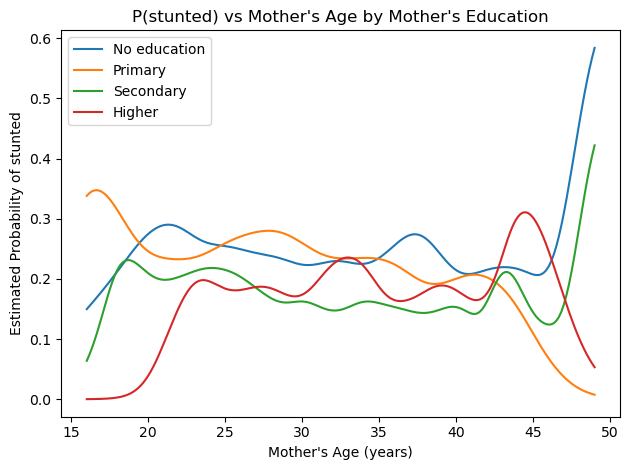

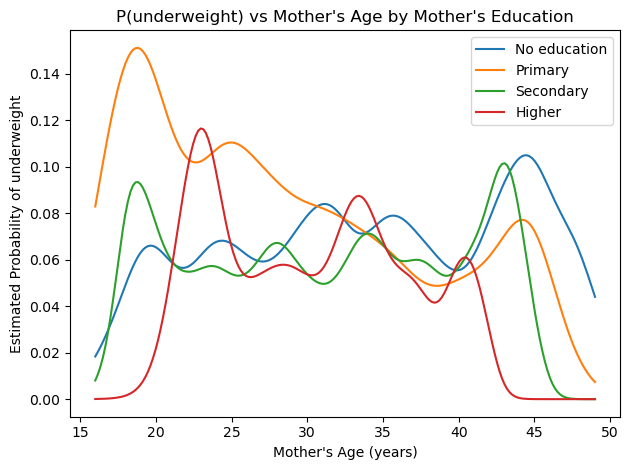

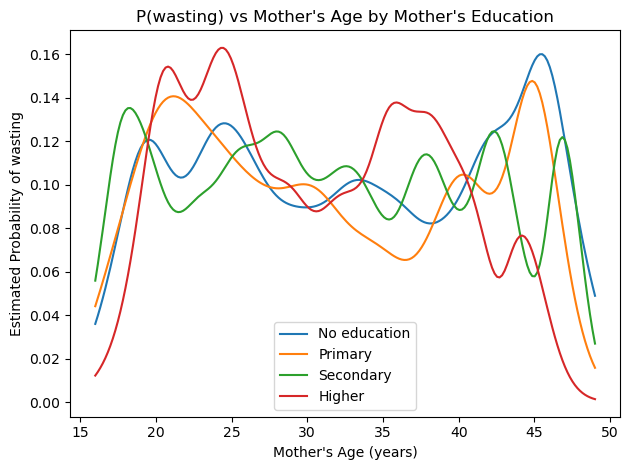

Saved tidy results to kernel_outputs_education/kernel_smoothing_education.csv
Saved plots to kernel_outputs_education/


In [16]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
INPUT_CSV = "Output.csv"
OUT_DIR   = "kernel_outputs_education"
N_GRID    = 200

# ---------- HELPERS ----------
def gaussian_kernel(u: np.ndarray) -> np.ndarray:
    return np.exp(-0.5 * u * u) / np.sqrt(2 * np.pi)

def silverman_bandwidth(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    n = x.size
    if n < 2:
        return np.nan
    std = np.std(x, ddof=1)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    sigma = min(std, iqr / 1.349) if std > 0 else (iqr / 1.349 if iqr > 0 else 1.0)
    h = 1.06 * sigma * (n ** (-1/5))
    if not np.isfinite(h) or h <= 0:
        h = max(std, 1.0) * (n ** (-1/5)) * 0.9
    return h

def nadaraya_watson_prob(x: np.ndarray, y: np.ndarray, grid: np.ndarray, h: float) -> np.ndarray:
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]
    if x.size == 0 or not np.isfinite(h) or h <= 0:
        return np.full_like(grid, np.nan, dtype=float)
    diffs = (x[:, None] - grid[None, :]) / h
    w = gaussian_kernel(diffs)
    num = (w * y[:, None]).sum(axis=0)
    den = w.sum(axis=0)
    with np.errstate(invalid="ignore", divide="ignore"):
        p = num / den
    return np.clip(p, 0, 1)

# ---------- MAIN ----------
def main(input_csv=INPUT_CSV, out_dir=OUT_DIR, n_grid=N_GRID):
    os.makedirs(out_dir, exist_ok=True)
    df = pd.read_csv(input_csv)

    # Filter children under 5, valid anthropometry
    work = df[
        (df["HW1"] <= 59) &
        (df["HW70"] < 9990) & (df["HW71"] < 9990) & (df["HW72"] < 9990)
    ].copy()

    # Outcomes
    work["stunted"]     = (work["HW70"] < -200).astype(int)
    work["underweight"] = (work["HW71"] < -200).astype(int)
    work["wasting"]     = (work["HW72"] < -200).astype(int)

    # Mother's age
    work["V012"] = pd.to_numeric(work["V012"], errors="coerce")

    # Mother's education
    edu_map = {0: "No education", 1: "Primary", 2: "Secondary", 3: "Higher"}
    work["education"] = work["V106"].map(edu_map)
    work = work.dropna(subset=["V012", "education"])

    # Age grid
    age_all = work["V012"].to_numpy()
    age_grid = np.linspace(float(np.nanmin(age_all)), float(np.nanmax(age_all)), n_grid)

    outcomes = ["stunted", "underweight", "wasting"]
    records = []

    for outcome in outcomes:
        plt.figure()
        for edu_cat in ["No education", "Primary", "Secondary", "Higher"]:
            sub = work[work["education"] == edu_cat]
            if sub.empty:
                continue
            x, y = sub["V012"].to_numpy(), sub[outcome].to_numpy()
            h = silverman_bandwidth(x)
            p_hat = nadaraya_watson_prob(x, y, age_grid, h)
            plt.plot(age_grid, p_hat, label=edu_cat)
            records.append(pd.DataFrame({
                "age": age_grid,
                "p_hat": p_hat,
                "outcome": outcome,
                "education": edu_cat,
                "bandwidth": h
            }))
        plt.title(f"P({outcome}) vs Mother's Age by Mother's Education")
        plt.xlabel("Mother's Age (years)")
        plt.ylabel(f"Estimated Probability of {outcome}")
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(out_dir, f"{outcome}_by_education.png"), dpi=150)
        plt.show()

    tidy = pd.concat(records, ignore_index=True)
    tidy["age"] = tidy["age"].round(2)
    tidy["p_hat"] = tidy["p_hat"].round(4)
    tidy["bandwidth"] = tidy["bandwidth"].round(3)
    tidy.to_csv(os.path.join(out_dir, "kernel_smoothing_education.csv"), index=False)

    print(f"Saved tidy results to {out_dir}/kernel_smoothing_education.csv")
    print(f"Saved plots to {out_dir}/")

if __name__ == "__main__":
    main()


In [17]:
import pandas as pd
from scipy.stats import kruskal, mannwhitneyu, ks_2samp

# Load your cleaned data
df = pd.read_csv("Output.csv")

# Define outcome
df = df[(df["HW1"] <= 59) & (df["HW70"] < 9990)].copy()
df["stunted"] = (df["HW70"] < -200).astype(int)

# Education groups
edu_map = {0: "No education", 1: "Primary", 2: "Secondary", 3: "Higher"}
df["education"] = df["V106"].map(edu_map)

# --- Kruskal-Wallis (4 groups) ---
groups = [df.loc[df["education"] == g, "stunted"] for g in edu_map.values()]
stat, p = kruskal(*groups)
print("Kruskal–Wallis test for stunting by education:")
print(f"Statistic={stat:.3f}, p-value={p:.4f}")

# --- Urban vs Rural (Mann-Whitney) ---
df["residence"] = df["V025"].map({1: "Urban", 2: "Rural"})
urban = df.loc[df["residence"] == "Urban", "stunted"]
rural = df.loc[df["residence"] == "Rural", "stunted"]

u_stat, p_u = mannwhitneyu(urban, rural, alternative="two-sided")
ks_stat, p_ks = ks_2samp(urban, rural)

print("\nMann–Whitney U test (Urban vs Rural):")
print(f"U={u_stat:.3f}, p-value={p_u:.4f}")

print("Kolmogorov–Smirnov test (Urban vs Rural):")
print(f"KS={ks_stat:.3f}, p-value={p_ks:.4f}")


Kruskal–Wallis test for stunting by education:
Statistic=46.547, p-value=0.0000

Mann–Whitney U test (Urban vs Rural):
U=10220403.500, p-value=0.0341
Kolmogorov–Smirnov test (Urban vs Rural):
KS=0.018, p-value=0.4673


In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Output.csv")

# Define the variables
predictor_map = {
    "V012": "Mother's Age",
    "V106": "Mother's Education",
    "V701": "Father's Education",
    "V714": "Mother Working",
    "V704": "Father's Occupation",
    "V190": "Wealth Index",
    "V218": "Living Children",
    "V511": "Age at First Marriage",
    "V212": "Age at First Birth",
    "V445": "Mother's BMI",
    "V025": "Residence"
}

predictors = list(predictor_map.keys())

# Filter and preprocess data
df = df[
    (df["HW1"] <= 59) &
    (df["HW70"] < 9990)
].copy()

# Outcome variable
df["stunted"] = (df["HW70"] < -200).astype(int)

# Drop missing
df = df[predictors + ["stunted"]].dropna()

# Define X and y
X = df[predictors]
y = df["stunted"]

# Impute
imp = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imp.fit_transform(X), columns=predictors)

# Model
model = RandomForestClassifier(random_state=0, n_estimators=100)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Baseline AUC
baseline_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
print("Baseline AUC:", round(baseline_auc, 3))

# LOCO Impact
loco_results = []
for col in predictors:
    X_loco = X.drop(columns=[col])
    auc = cross_val_score(model, X_loco, y, cv=cv, scoring='roc_auc').mean()
    drop = baseline_auc - auc
    loco_results.append({
        "Variable": predictor_map[col],
        "AUC_without_variable": round(auc, 3),
        "AUC_drop": round(drop, 3)
    })

# Results DataFrame
loco_df = pd.DataFrame(loco_results).sort_values("AUC_drop", ascending=False)
print(loco_df)


Baseline AUC: 0.569
                 Variable  AUC_without_variable  AUC_drop
4     Father's Occupation                 0.552     0.017
9            Mother's BMI                 0.553     0.016
1      Mother's Education                 0.563     0.006
10              Residence                 0.566     0.003
8      Age at First Birth                 0.568     0.001
2      Father's Education                 0.570    -0.001
3          Mother Working                 0.570    -0.001
6         Living Children                 0.570    -0.001
7   Age at First Marriage                 0.570    -0.001
0            Mother's Age                 0.572    -0.003
5            Wealth Index                 0.572    -0.003


/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/2661441898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loco_df, x="AUC_drop", y="Variable", palette="viridis")


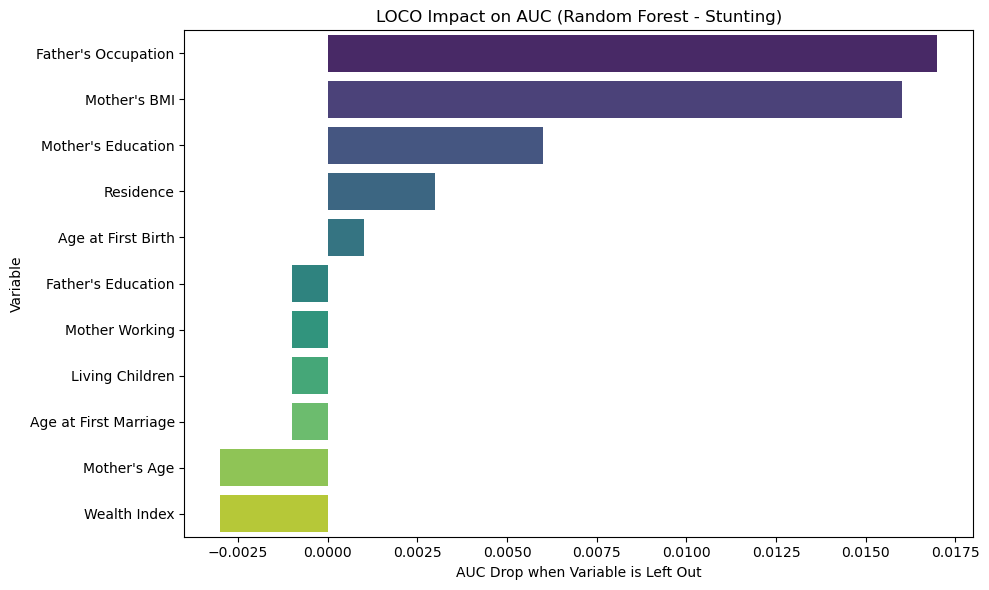

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loco_df, x="AUC_drop", y="Variable", palette="viridis")
plt.title("LOCO Impact on AUC (Random Forest - Stunting)")
plt.xlabel("AUC Drop when Variable is Left Out")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Output.csv")

# Define the variables
predictor_map = {
    "V012": "Mother's Age",
    "V106": "Mother's Education",
    "V701": "Father's Education",
    "V714": "Mother Working",
    "V704": "Father's Occupation",
    "V190": "Wealth Index",
    "V218": "Living Children",
    "V511": "Age at First Marriage",
    "V212": "Age at First Birth",
    "V445": "Mother's BMI",
    "V025": "Residence"
}

predictors = list(predictor_map.keys())

# Filter and preprocess data
df = df[
    (df["HW1"] <= 59) &
    (df["HW71"] < 9990)
].copy()

# Outcome variable
df["underweight"] = (df["HW71"] < -200).astype(int)

# Drop missing
df = df[predictors + ["underweight"]].dropna()

# Define X and y
X = df[predictors]
y = df["underweight"]

# Impute
imp = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imp.fit_transform(X), columns=predictors)

# Model
model = RandomForestClassifier(random_state=0, n_estimators=100)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Baseline AUC
baseline_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
print("Baseline AUC:", round(baseline_auc, 3))

# LOCO Impact
loco_results = []
for col in predictors:
    X_loco = X.drop(columns=[col])
    auc = cross_val_score(model, X_loco, y, cv=cv, scoring='roc_auc').mean()
    drop = baseline_auc - auc
    loco_results.append({
        "Variable": predictor_map[col],
        "AUC_without_variable": round(auc, 3),
        "AUC_drop": round(drop, 3)
    })

# Results DataFrame
loco_df = pd.DataFrame(loco_results).sort_values("AUC_drop", ascending=False)
print(loco_df)


Baseline AUC: 0.565
                 Variable  AUC_without_variable  AUC_drop
9            Mother's BMI                 0.529     0.036
5            Wealth Index                 0.555     0.010
0            Mother's Age                 0.555     0.009
8      Age at First Birth                 0.560     0.005
3          Mother Working                 0.561     0.004
10              Residence                 0.560     0.004
6         Living Children                 0.562     0.003
7   Age at First Marriage                 0.562     0.003
1      Mother's Education                 0.564     0.001
2      Father's Education                 0.563     0.001
4     Father's Occupation                 0.564     0.001


/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/2473398303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loco_df, x="AUC_drop", y="Variable", palette="viridis")


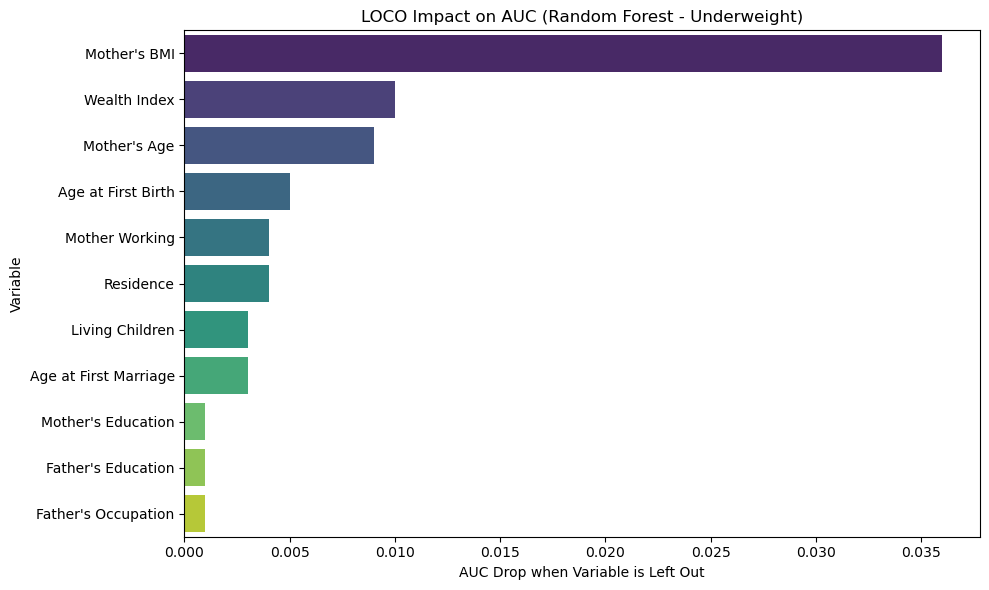

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loco_df, x="AUC_drop", y="Variable", palette="viridis")
plt.title("LOCO Impact on AUC (Random Forest - Underweight)")
plt.xlabel("AUC Drop when Variable is Left Out")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Output.csv")

# Define the variables
predictor_map = {
    "V012": "Mother's Age",
    "V106": "Mother's Education",
    "V701": "Father's Education",
    "V714": "Mother Working",
    "V704": "Father's Occupation",
    "V190": "Wealth Index",
    "V218": "Living Children",
    "V511": "Age at First Marriage",
    "V212": "Age at First Birth",
    "V445": "Mother's BMI",
    "V025": "Residence"
}

predictors = list(predictor_map.keys())

# Filter and preprocess data
df = df[
    (df["HW1"] <= 59) &
    (df["HW72"] < 9990)
].copy()

# Outcome variable
df["wasting"] = (df["HW72"] < -200).astype(int)

# Drop missing
df = df[predictors + ["wasting"]].dropna()

# Define X and y
X = df[predictors]
y = df["wasting"]

# Impute
imp = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imp.fit_transform(X), columns=predictors)

# Model
model = RandomForestClassifier(random_state=0, n_estimators=100)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Baseline AUC
baseline_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
print("Baseline AUC:", round(baseline_auc, 3))

# LOCO Impact
loco_results = []
for col in predictors:
    X_loco = X.drop(columns=[col])
    auc = cross_val_score(model, X_loco, y, cv=cv, scoring='roc_auc').mean()
    drop = baseline_auc - auc
    loco_results.append({
        "Variable": predictor_map[col],
        "AUC_without_variable": round(auc, 3),
        "AUC_drop": round(drop, 3)
    })

# Results DataFrame
loco_df = pd.DataFrame(loco_results).sort_values("AUC_drop", ascending=False)
print(loco_df)


Baseline AUC: 0.601
                 Variable  AUC_without_variable  AUC_drop
9            Mother's BMI                 0.570     0.032
1      Mother's Education                 0.586     0.016
4     Father's Occupation                 0.593     0.009
0            Mother's Age                 0.594     0.008
2      Father's Education                 0.597     0.004
3          Mother Working                 0.597     0.004
8      Age at First Birth                 0.599     0.003
10              Residence                 0.599     0.003
6         Living Children                 0.599     0.002
5            Wealth Index                 0.602    -0.000
7   Age at First Marriage                 0.602    -0.000


/var/folders/zf/_tj8vxc92t1_zk8zhz_d81fh0000gn/T/ipykernel_9109/2605225155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loco_df, x="AUC_drop", y="Variable", palette="viridis")


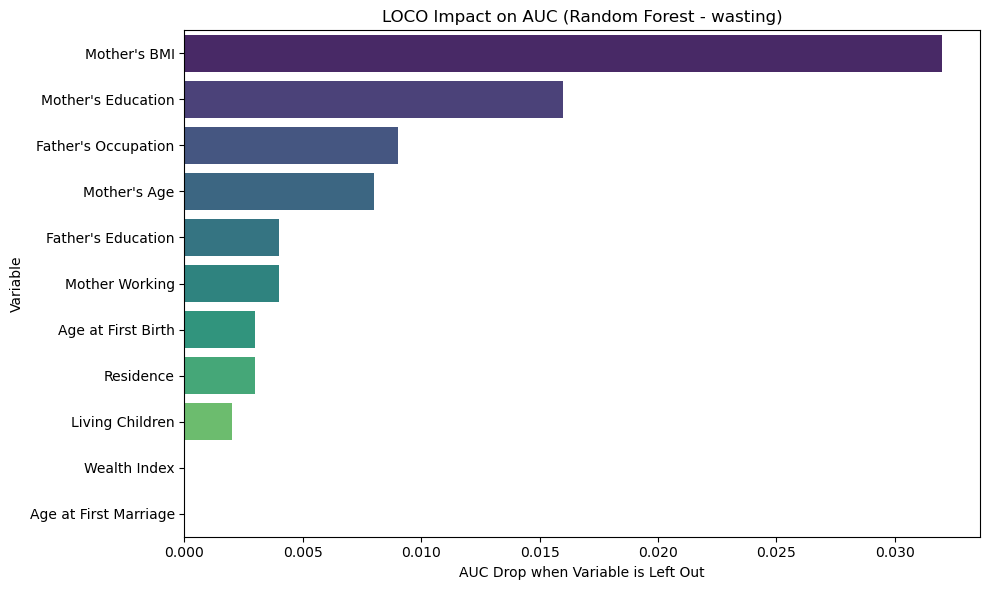

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loco_df, x="AUC_drop", y="Variable", palette="viridis")
plt.title("LOCO Impact on AUC (Random Forest - wasting)")
plt.xlabel("AUC Drop when Variable is Left Out")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()